In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# **The Invitations : Selecting the best clients to invite for a marketing action**

**1. Exploratory Data Analysis**

In [82]:
action_data = pd.read_csv("/content/actions.csv")
client_data = pd.read_csv("/content/clients.csv")
transaction_data = pd.read_csv("/content/transactions.csv")

In [47]:
action_data.columns

Index(['action_id', 'action_type_label', 'action_subcategory_label',
       'action_start_date', 'action_year', 'action_end_date',
       'action_collection_year', 'action_collection', 'action_universe',
       'action_category_label', 'action_channel', 'action_label', 'client_id',
       'client_is_present', 'client_is_invited'],
      dtype='object')

In [48]:
transaction_data.columns

Index(['client_id', 'transaction_id', 'transaction_date', 'product_quantity',
       'gross_amount_euro', 'product_category', 'product_subcategory',
       'product_style'],
      dtype='object')

In [49]:
client_data.columns

Index(['client_id', 'client_country', 'client_gender', 'client_nationality',
       'client_city', 'client_segment', 'client_premium_status',
       'client_is_phone_contactable', 'client_is_email_contactable',
       'client_is_instant_messaging_contactable', 'client_is_contactable'],
      dtype='object')

In [83]:
# Merge action_data with transaction_data on 'client_id'
merged_temp = pd.merge(action_data, transaction_data, on='client_id', how='inner')

# Merge the result with client_data on 'client_id'
merged_data = pd.merge(merged_temp, client_data, on='client_id', how='inner')

In [105]:
merged_data.dtypes

action_id                                   object
action_type_label                           object
action_subcategory_label                    object
action_start_date                           object
action_year                                float64
action_end_date                             object
action_collection_year                     float64
action_collection                           object
action_universe                             object
action_category_label                       object
action_channel                              object
action_label                                object
client_id                                   object
client_is_present                          float64
client_is_invited                          float64
transaction_id                              object
transaction_date                            object
product_quantity                           float64
gross_amount_euro                          float64
product_category               

In [106]:
merged_data.isna().sum()

action_id                                  21476
action_type_label                          21476
action_subcategory_label                   21476
action_start_date                          21476
action_year                                21476
action_end_date                            21476
action_collection_year                     21476
action_collection                          21491
action_universe                            21476
action_category_label                      21476
action_channel                             32556
action_label                               21476
client_id                                      0
client_is_present                          21476
client_is_invited                          21476
transaction_id                             14916
transaction_date                           14916
product_quantity                           14916
gross_amount_euro                          14916
product_category                           14916
product_subcategory 

In [84]:
merged_data["transaction_date"] = pd.to_datetime(merged_data["transaction_date"])
merged_data["action_start_date"] = pd.to_datetime(merged_data["action_start_date"])
merged_data["action_end_date"] = pd.to_datetime(merged_data["action_end_date"])
merged_data["action_duration"] = merged_data["action_end_date"] - merged_data["action_start_date"]

1.1. Visualizing Client Profile and Behavior

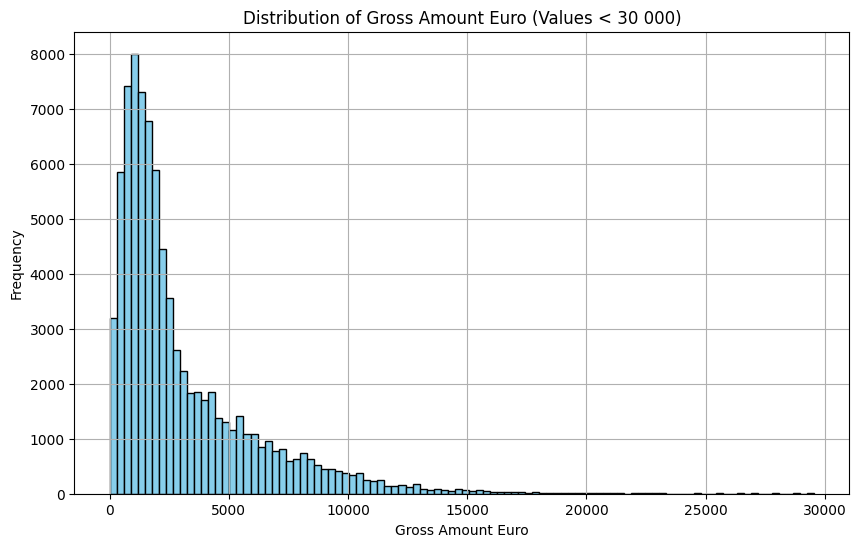

In [108]:
# Visualize Distribution of Purchase Prices less than 30K
plt.figure(figsize=(10, 6))
plt.hist(merged_data[merged_data['gross_amount_euro']<30000]["gross_amount_euro"], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Gross Amount Euro (Values < 30 000)')
plt.xlabel('Gross Amount Euro')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

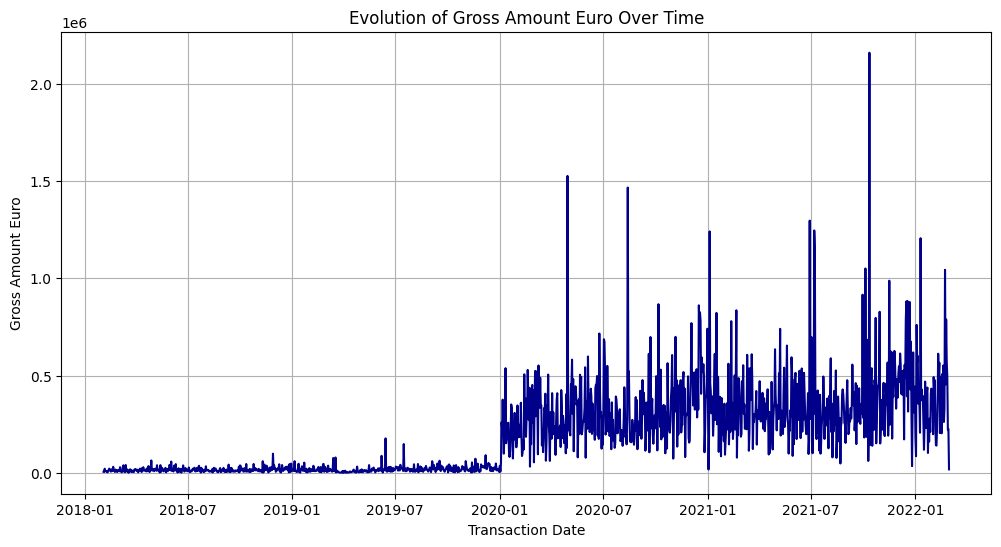

In [115]:
merged_data = merged_data.sort_values(by='transaction_date')

# Plotting the evolution of 'gross_amount_euro' over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['transaction_date'].dropna().unique(), merged_data.groupby('transaction_date')['gross_amount_euro'].sum(), linestyle='-', color='darkblue')
plt.title('Evolution of Gross Amount Euro Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Gross Amount Euro')
plt.grid(True)
plt.show()

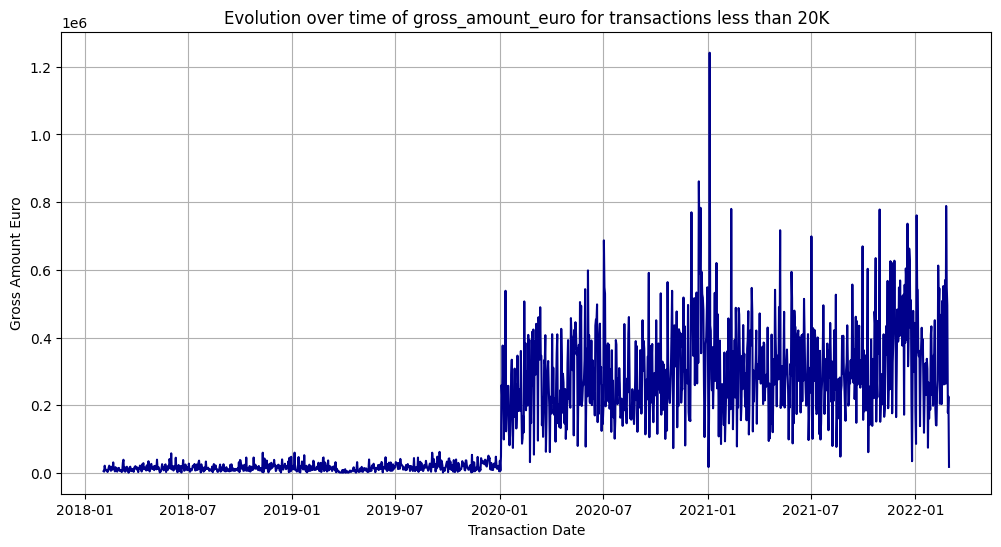

In [100]:
merged_data = merged_data.sort_values(by='transaction_date')

# Plotting the evolution over time of 'gross_amount_euro' for transactions less than 20K
plt.figure(figsize=(12, 6))
plt.plot(merged_data[merged_data['gross_amount_euro']<20000]['transaction_date'].unique(), merged_data[merged_data['gross_amount_euro']<20000].groupby('transaction_date')['gross_amount_euro'].sum(), linestyle='-', color='darkblue')
plt.title('Evolution over time of gross_amount_euro for transactions less than 20K')
plt.xlabel('Transaction Date')
plt.ylabel('Gross Amount Euro')
plt.grid(True)
plt.show()

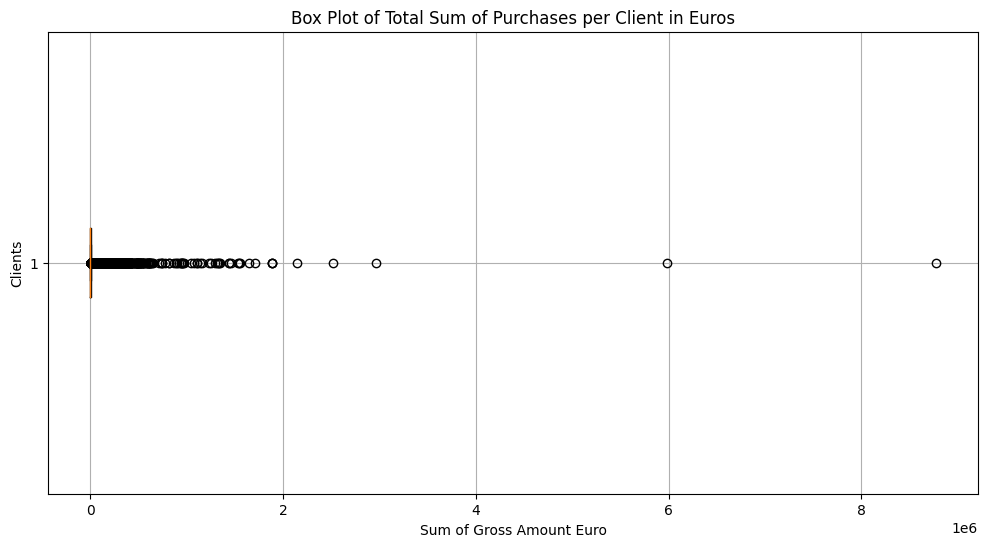

In [80]:
total_amount_euro_per_client = merged_data.groupby("client_id")["gross_amount_euro"].sum()

# Plot total amounts spent by clients
plt.figure(figsize=(12, 6))
plt.boxplot(total_amount_euro_per_client, vert=False)
plt.title('Box Plot of Total Sum of Purchases per Client in Euros')
plt.xlabel('Sum of Gross Amount Euro')
plt.ylabel('Clients')
plt.grid(True)
plt.show()

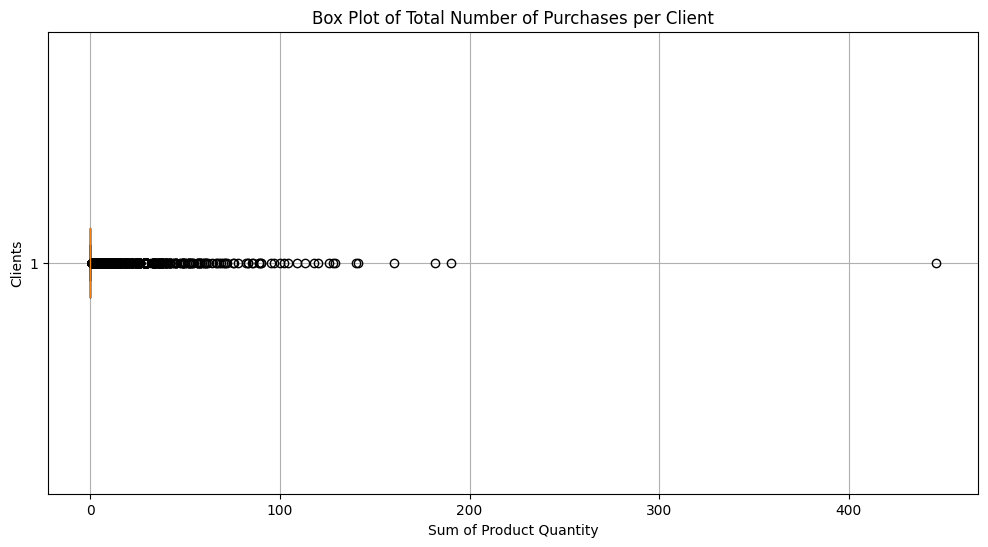

In [14]:
total_quantity_per_client = merged_data.groupby("client_id")["product_quantity"].sum()

# Plot total amounts spent by clients
plt.figure(figsize=(12, 6))
plt.boxplot(total_quantity_per_client, vert=False)
plt.title('Box Plot of Total Number of Purchases per Client')
plt.xlabel('Sum of Product Quantity')
plt.ylabel('Clients')
plt.grid(True)
plt.show()

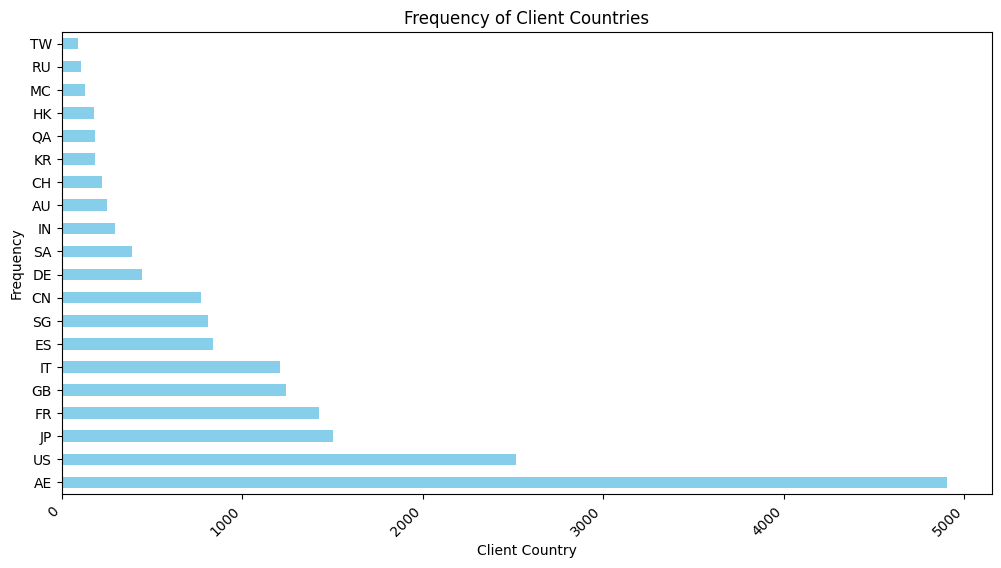

In [61]:
# Visualize most frequent client countries
country_counts = client_data['client_country'].value_counts().head(20)

plt.figure(figsize=(12, 6))
country_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Countries')
plt.xlabel('Client Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

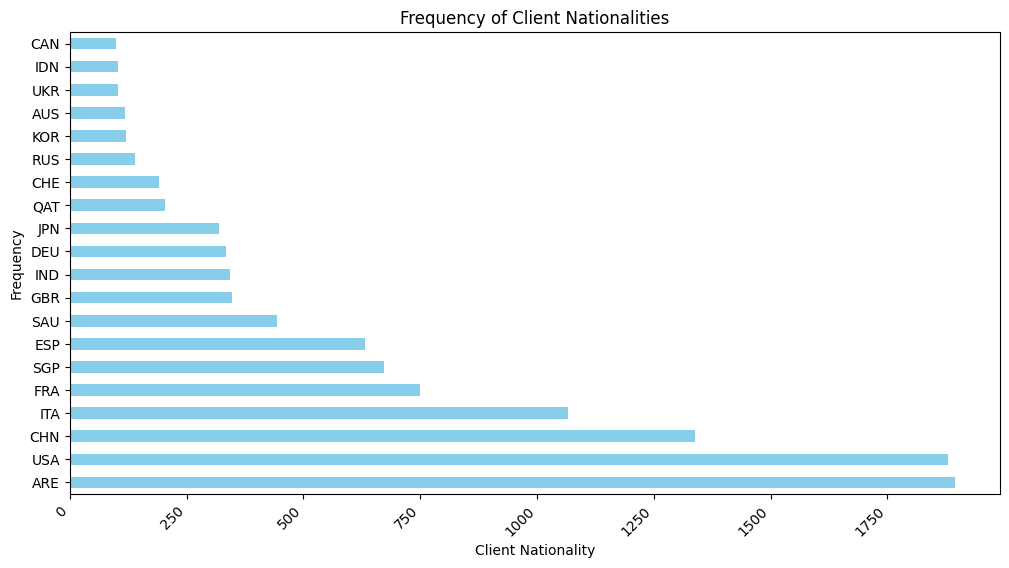

In [62]:
# Visualize most frequent client nationalities
nationality_counts = client_data['client_nationality'].value_counts().head(20)

plt.figure(figsize=(12, 6))
nationality_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Nationalities')
plt.xlabel('Client Nationality')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

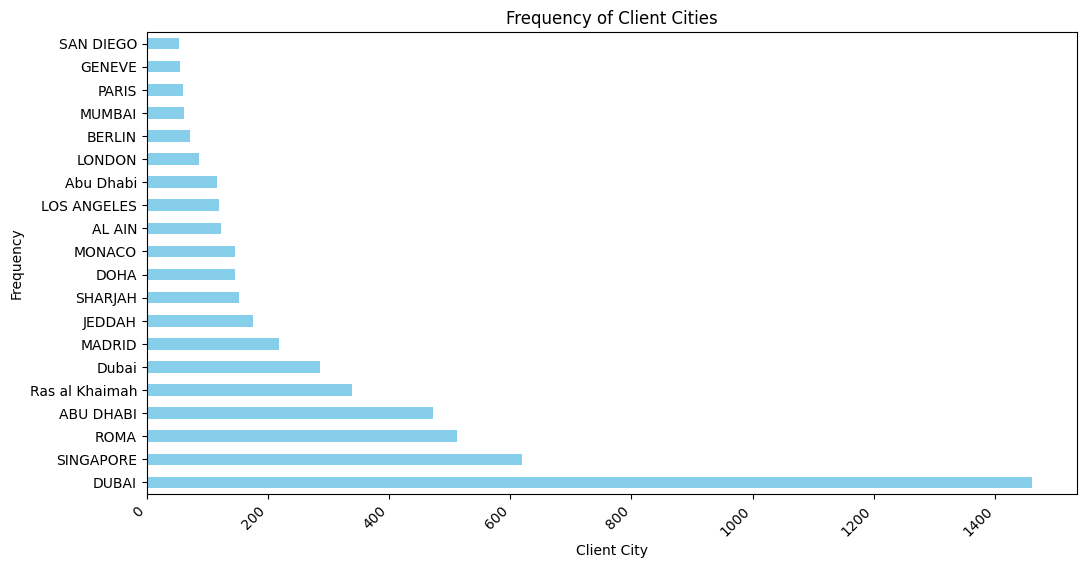

In [63]:
# Visualize most frequent client cities
city_counts = client_data['client_city'].value_counts().head(20)

plt.figure(figsize=(12, 6))
city_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Cities')
plt.xlabel('Client City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

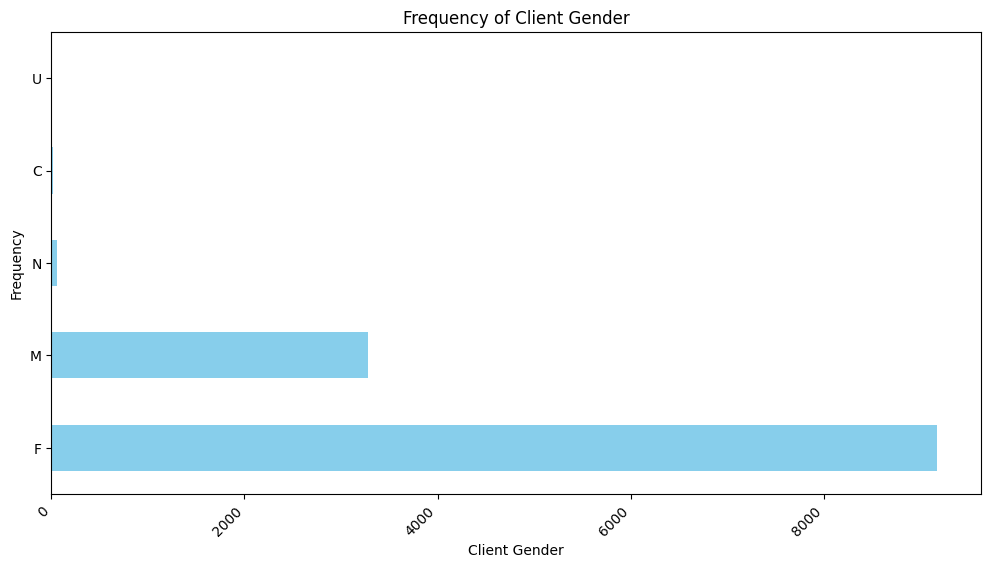

In [64]:
# Visualize most frequent client gender
gender_counts = client_data['client_gender'].value_counts().head(20)

plt.figure(figsize=(12, 6))
gender_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Gender')
plt.xlabel('Client Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

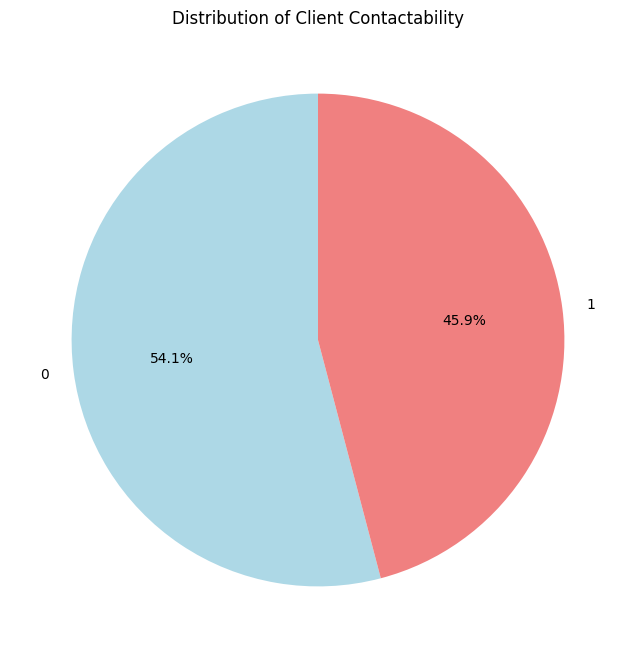

In [94]:
client_data['client_is_contactable'] = client_data['client_is_contactable'].astype('int')

# Visualizing proportion of contactable clients
contactable_counts = client_data['client_is_contactable'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contactable_counts, labels=contactable_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Client Contactability')
plt.show()

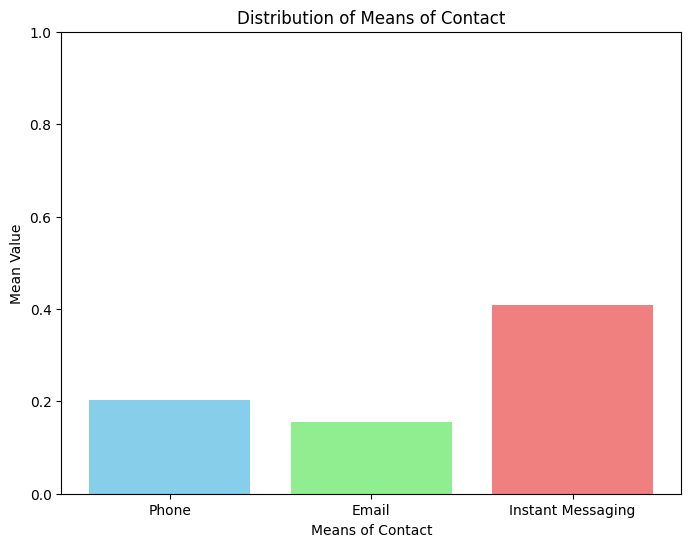

In [83]:
# Extract the mean values for each contact method
mean_phone_contactable = client_data['client_is_phone_contactable'].mean()
mean_email_contactable = client_data['client_is_email_contactable'].mean()
mean_instant_messaging_contactable = client_data['client_is_instant_messaging_contactable'].mean()

# Plotting a bar graph
contact_methods = ['Phone', 'Email', 'Instant Messaging']
means_of_contact = [mean_phone_contactable, mean_email_contactable, mean_instant_messaging_contactable]

plt.figure(figsize=(8, 6))
plt.bar(contact_methods, means_of_contact, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Means of Contact')
plt.xlabel('Means of Contact')
plt.ylabel('Mean Value')
plt.ylim(0, 1)
plt.show()

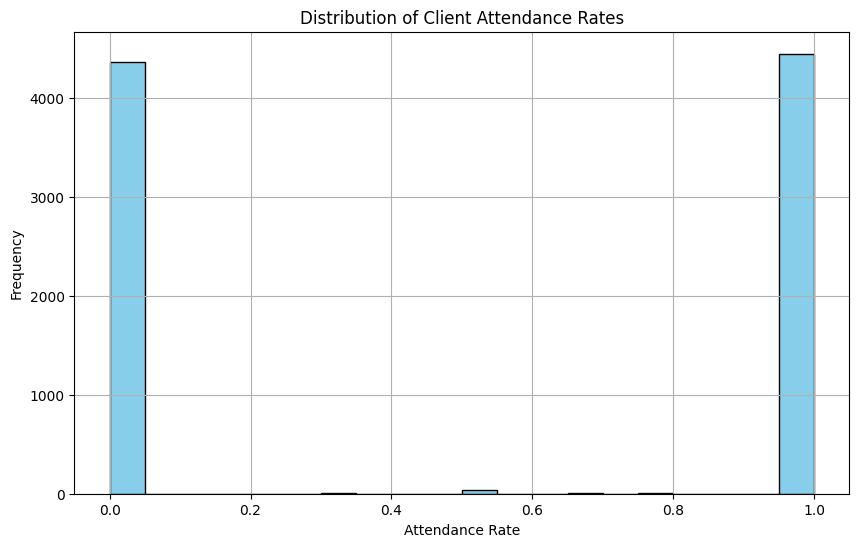

In [113]:
# Calculate the attendance rate for each client
action_data[action_data['client_is_invited'] == 1].groupby('client_id')["client_is_present"].mean()

# Visualize the distribution of attendance rates
plt.figure(figsize=(10, 6))
plt.hist(action_data[action_data['client_is_invited'] == 1].groupby('client_id')["client_is_present"].mean()
, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Attendance Rates')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

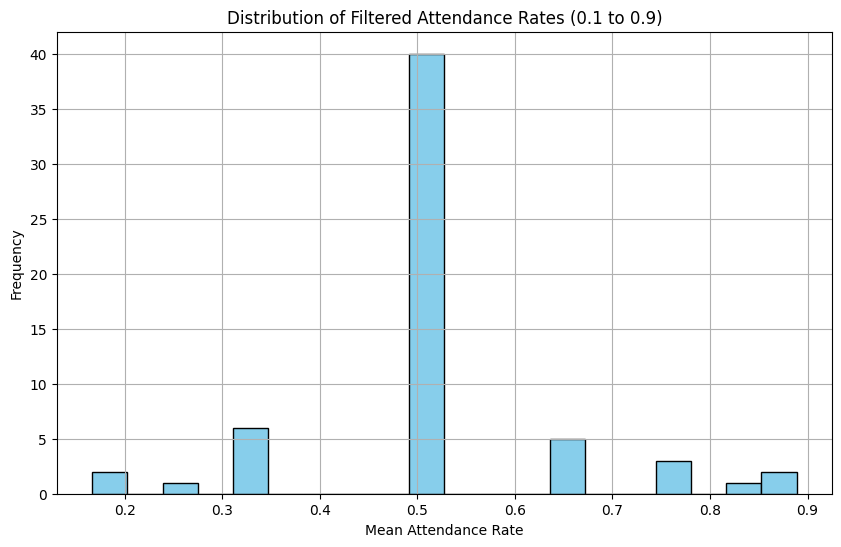

In [143]:
# Calculate the mean attendance rate for each client
mean_attendance_rates = action_data[action_data['client_is_invited'] == 1].groupby('client_id')["client_is_present"].mean()

# Filter attendance rates between 0.1 and 0.9
filtered_attendance_rates = mean_attendance_rates[mean_attendance_rates.between(0.1, 0.9)]

# Visualize the distribution of filtered attendance rates
plt.figure(figsize=(10, 6))
plt.hist(filtered_attendance_rates, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Filtered Attendance Rates (0.1 to 0.9)')
plt.xlabel('Mean Attendance Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

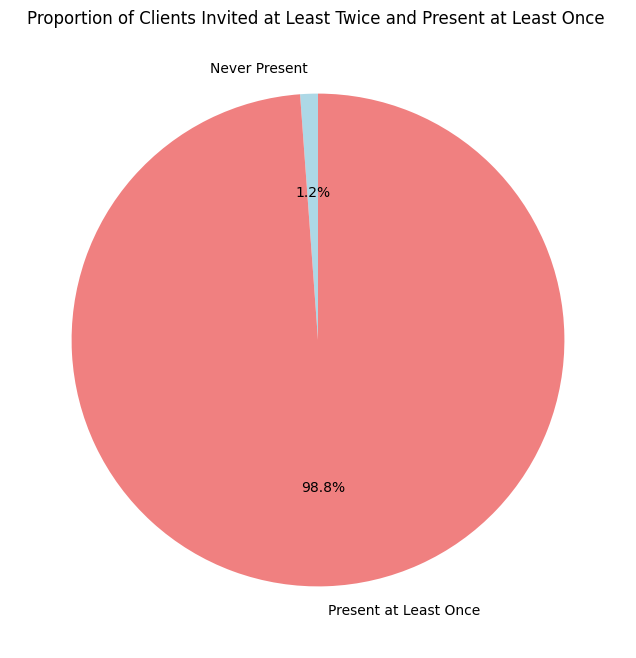

In [140]:
# Calculate the total number of 1s in 'client_is_invited' for each client
action_data.groupby('client_id')['client_is_invited'].sum()

# Create a mask for clients with more than two 1s in 'client_is_invited'
more_than_five_invited = action_data.groupby('client_id')['client_is_invited'].sum() >= 2

# Create a mask for clients with no 1s in 'client_is_present'
no_present = action_data.groupby('client_id')['client_is_present'].sum() == 0

# Combine masks to identify clients meeting both criteria
selected_clients = more_than_five_invited & no_present

# Calculate the proportion of selected clients
proportion_selected = selected_clients.mean()

# Visualize the proportion
labels = ['Never Present', 'Present at Least Once']
sizes = [proportion_selected, 1 - proportion_selected]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Clients Invited at Least Twice and Present at Least Once ')
plt.show()

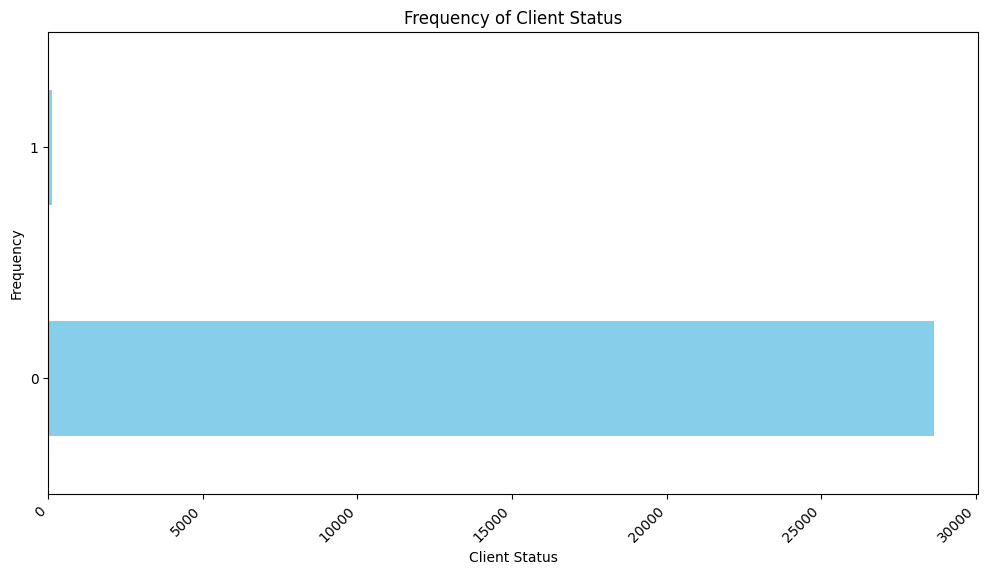

Percentage of premium clients: 0.38607352787729127


In [66]:
# Visualize distribution of client status
premium_counts = client_data['client_premium_status'].value_counts()

plt.figure(figsize=(12, 6))
premium_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Client Status')
plt.xlabel('Client Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

print(f"Percentage of premium clients: {len(client_data[client_data['client_premium_status']==1]['client_id'])/len(client_data['client_id'])*100}")

1.2. Visualizing Premium Client Profile and Behavior

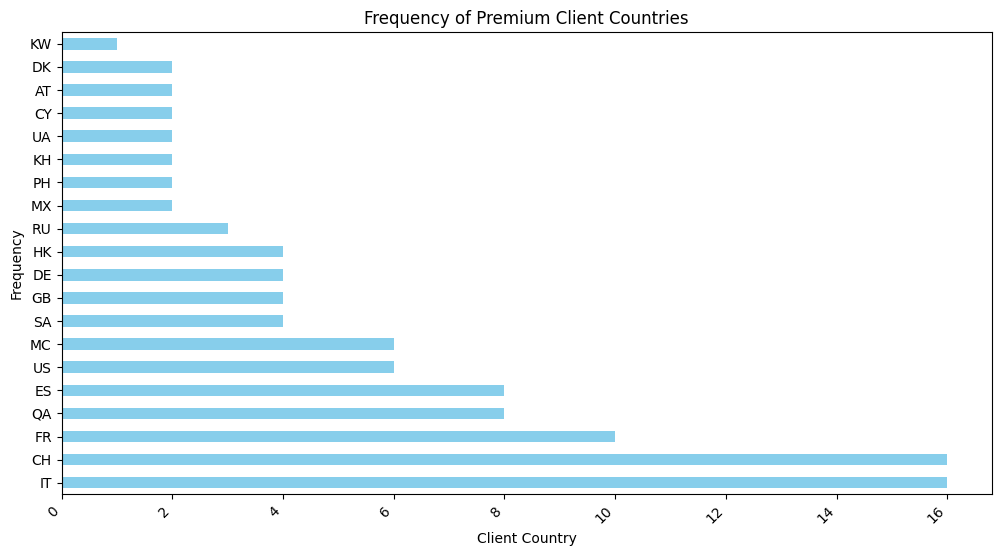

In [70]:
premium_client_data = client_data[client_data['client_premium_status']==1]

# Visualize most frequent premium client countries
premium_country_counts = premium_client_data['client_country'].value_counts().head(20)

plt.figure(figsize=(12, 6))
premium_country_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Premium Client Countries')
plt.xlabel('Client Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

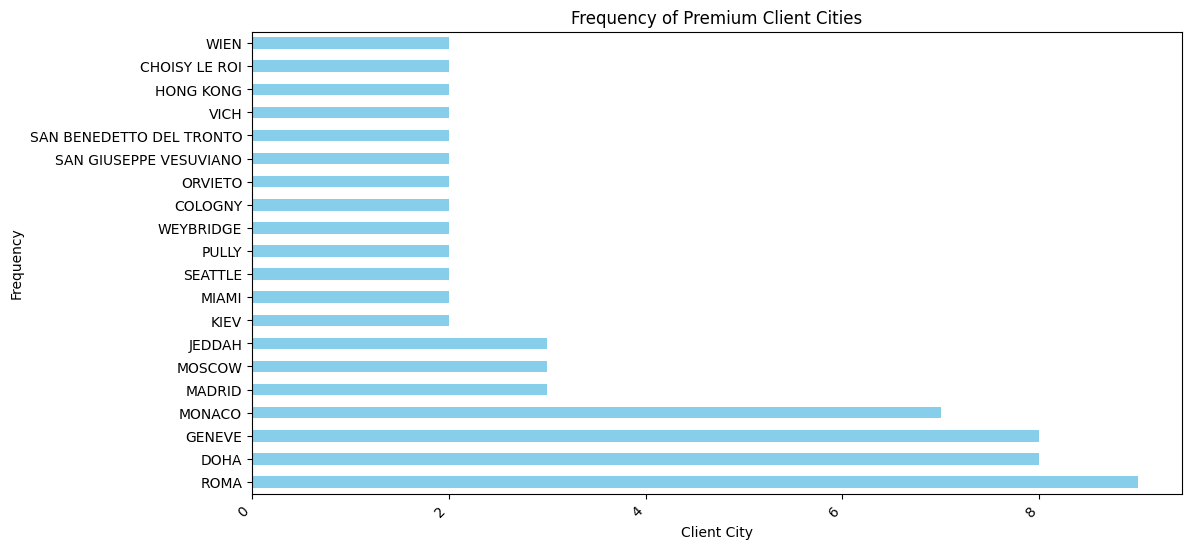

In [71]:
# Visualize most frequent premium client cities
premium_city_counts = premium_client_data['client_city'].value_counts().head(20)

plt.figure(figsize=(12, 6))
premium_city_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Premium Client Cities')
plt.xlabel('Client City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

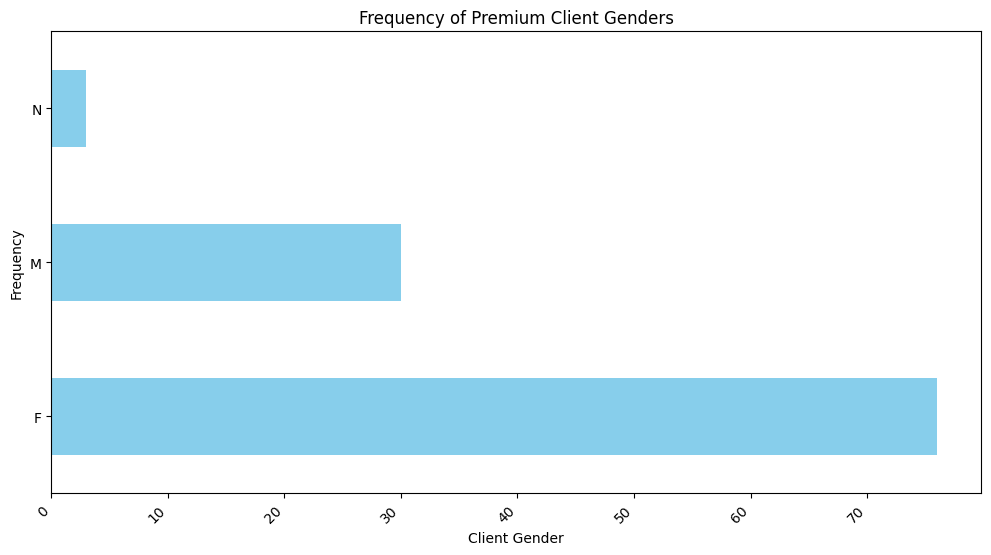

In [73]:
# Visualize most frequent premium client genders
premium_gender_counts = premium_client_data['client_gender'].value_counts().head(20)

plt.figure(figsize=(12, 6))
premium_gender_counts.plot(kind='barh', color='skyblue')
plt.title('Frequency of Premium Client Genders')
plt.xlabel('Client Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

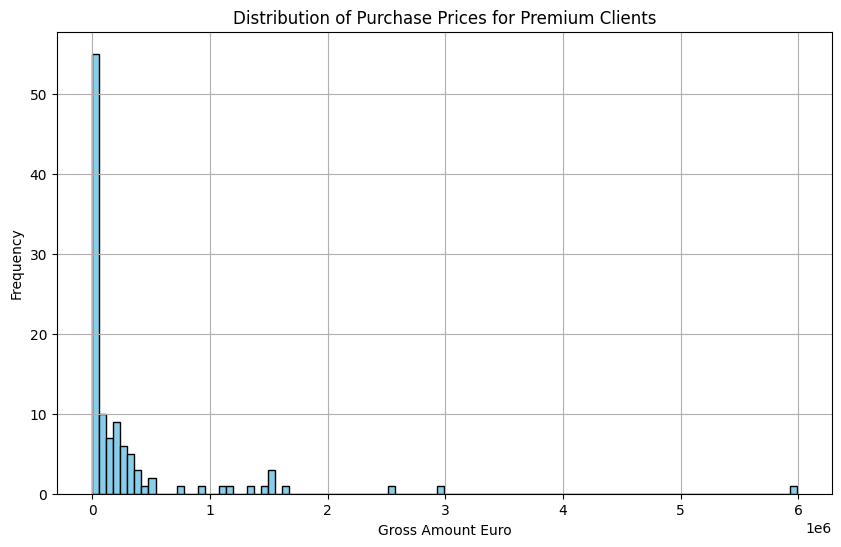

In [78]:
# Visualize Distribution of Premium Clients Purchase Prices
plt.figure(figsize=(10, 6))
plt.hist(merged_data[merged_data["client_premium_status"]==1].groupby("client_id")["gross_amount_euro"].sum(), bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Prices for Premium Clients')
plt.xlabel('Gross Amount Euro')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-95-4903bf3243d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_client_data['client_is_contactable'] = premium_client_data['client_is_contactable'].astype('int')


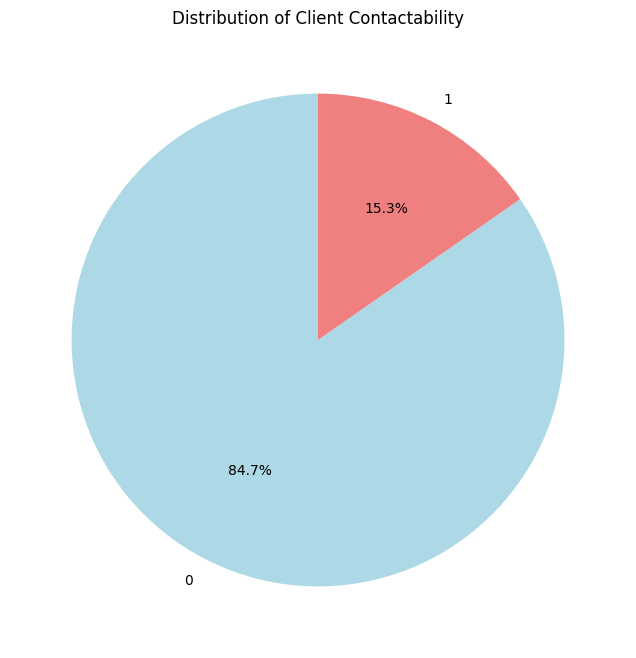

In [95]:
premium_client_data['client_is_contactable'] = premium_client_data['client_is_contactable'].astype('int')

# Visualizing proportion of contactable premium clients
premium_contactable_counts = premium_client_data['client_is_contactable'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(premium_contactable_counts, labels=contactable_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Client Contactability')
plt.show()

**2. Time Series Analysis**

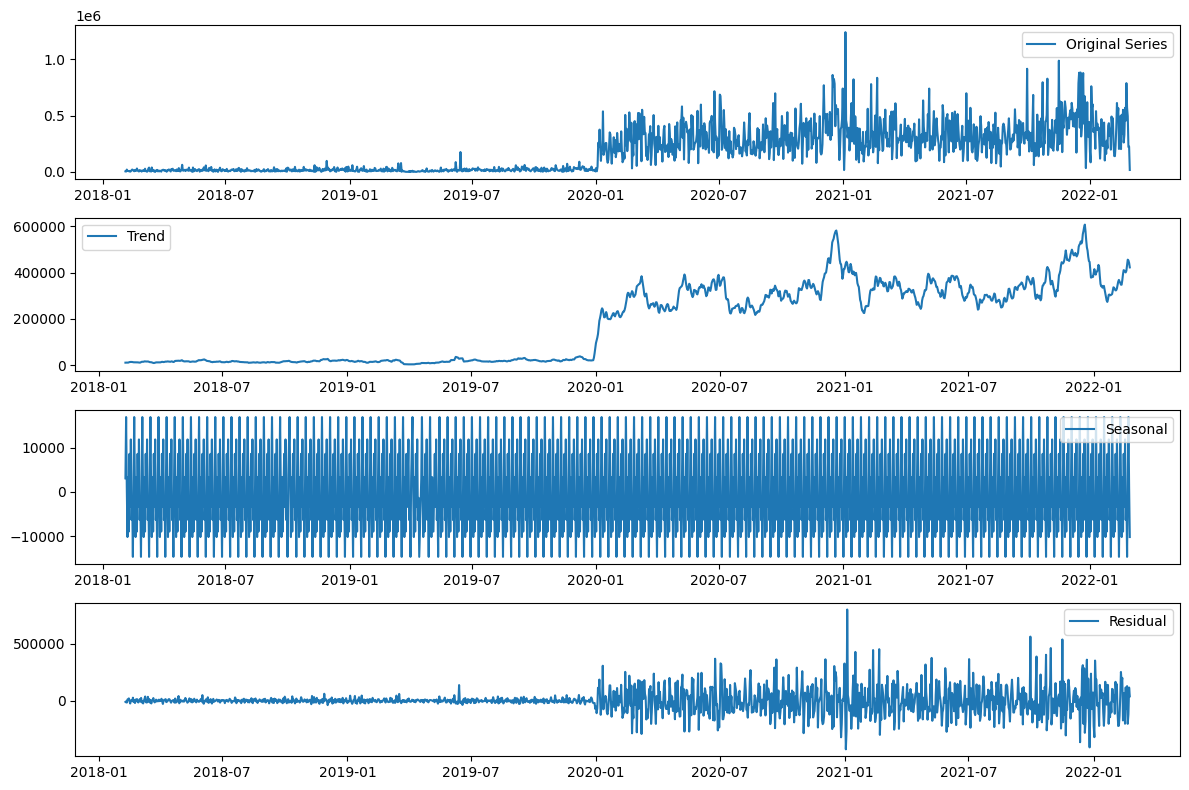

In [146]:
#merged_data.set_index('transaction_date', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(merged_data[merged_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum().dropna(), model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(merged_data[merged_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum(), label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

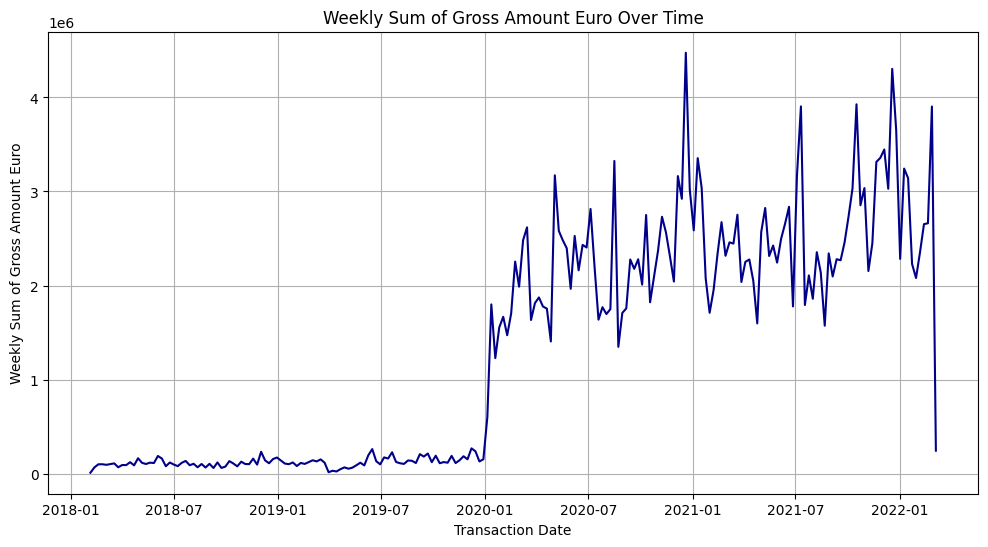

In [82]:
# Resample the data weekly and calculate the sum of 'gross_amount_euro'
weekly_sum = merged_data['gross_amount_euro'].resample('W').sum()

# Plot the weekly sum of 'gross_amount_euro' over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_sum, linestyle='-', color='darkblue')
plt.title('Weekly Sum of Gross Amount Euro Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Weekly Sum of Gross Amount Euro')
plt.grid(True)
plt.show()

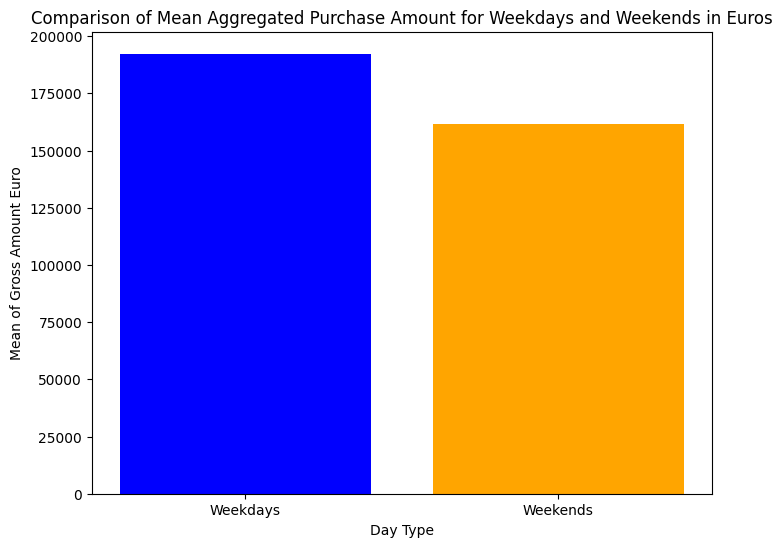

In [83]:
# Extract day of the week (0 = Monday, 6 = Sunday)
merged_data['day_of_week'] = merged_data.index.dayofweek

# Separate data for weekdays and weekends
weekdays_data = merged_data[merged_data['day_of_week'] < 5]
weekends_data = merged_data[merged_data['day_of_week'] >= 5]

# Calculate the sum of 'gross_amount_euro' for weekdays and weekends
mean_weekdays = weekdays_data[weekdays_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum().mean()
mean_weekends = weekends_data[weekends_data['gross_amount_euro']<100000].groupby('transaction_date')['gross_amount_euro'].sum().mean()

plt.figure(figsize=(8, 6))
plt.bar(['Weekdays', 'Weekends'], [mean_weekdays, mean_weekends], color=['blue', 'orange'])
plt.title('Comparison of Mean Aggregated Purchase Amount for Weekdays and Weekends in Euros')
plt.xlabel('Day Type')
plt.ylabel('Mean of Gross Amount Euro')
plt.show()

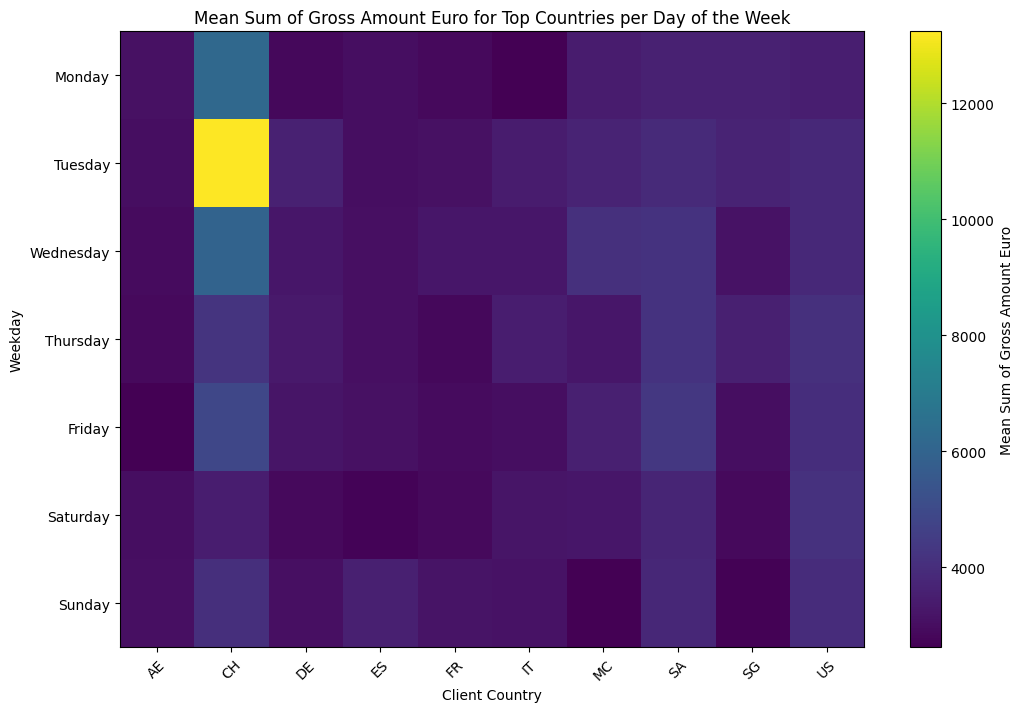

In [144]:
# Extract day of the week (0 = Monday, 6 = Sunday)
merged_data['week_day'] = merged_data.index.dayofweek

# Select the top N countries with the biggest total sum
country_sums = merged_data.groupby('client_country')['gross_amount_euro'].sum()
top_countries = country_sums.nlargest(10).index
filtered_data = merged_data[merged_data['client_country'].isin(top_countries)]

# Group by 'client_country' and 'week_day' and calculate the mean sum of 'gross_amount_euro'
grouped_data = filtered_data.groupby(['client_country', 'week_day'])['gross_amount_euro'].mean()
grouped_data = grouped_data.reset_index()
pivot_data = grouped_data.pivot(index='week_day', columns='client_country', values='gross_amount_euro')

plt.figure(figsize=(12, 8))
plt.imshow(pivot_data, cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar(label='Mean Sum of Gross Amount Euro')
plt.title('Mean Sum of Gross Amount Euro for Top Countries per Day of the Week')
plt.xlabel('Client Country')
plt.ylabel('Weekday')
plt.xticks(range(len(pivot_data.columns)), pivot_data.columns, rotation=45)
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

**2.1. Measuring Incremental Effect of Event Invitation on Sales**

In [85]:
# Filter data for 'client_is_invited' == 1 and 'transaction_date' less than 1 month after 'action_start_date'
filtered_data = merged_data[(merged_data['client_is_invited'] == 1) & (merged_data['action_start_date'] < merged_data['transaction_date']) & (merged_data['transaction_date'] < merged_data['action_start_date'] + pd.DateOffset(months=1))]

# Group by 'client_id' and 'action_id' and calculate the sum of 'gross_amount_euro'
incremental_sales_per_client = filtered_data.groupby(['client_id','action_id'])['gross_amount_euro'].sum().reset_index()

In [105]:
# Filter data for 'client_is_invited' == 1 and transaction date is between one month before and the action date
filtered_data_before = merged_data[(merged_data['client_is_invited'] == 1) &
                                   (merged_data['transaction_date'] >= merged_data['action_start_date'] - pd.DateOffset(months=1)) &
                                   (merged_data['transaction_date'] < merged_data['action_start_date'])]

# Group by 'client_id' and 'action_id' and calculate the sum of 'gross_amount_euro' for one month before the action date
sum_before = filtered_data_before.groupby(['client_id', 'action_id'])['gross_amount_euro'].sum().reset_index()

# Filter data for 'client_is_invited' == 1 and transaction date is between the action date and one month after
filtered_data_after = merged_data[(merged_data['client_is_invited'] == 1) &
                                  (merged_data['transaction_date'] >= merged_data['action_start_date']) &
                                  (merged_data['transaction_date'] < merged_data['action_start_date'] + pd.DateOffset(months=1))]

# Group by 'client_id' and 'action_id' and calculate the sum of 'gross_amount_euro' for one month after the action date
sum_after = filtered_data_after.groupby(['client_id', 'action_id'])['gross_amount_euro'].sum().reset_index()

# Merge the sum_before and sum_after dataframes with the original dataframe
merged_data = pd.merge(merged_data, sum_before, on=['client_id', 'action_id'], how='left', suffixes=('', '_before'))
merged_data = pd.merge(merged_data, sum_after, on=['client_id', 'action_id'], how='left', suffixes=('', '_after'))


In [87]:
# Calculate incremental sales within one month after event
merged_data["incremental_sales"] = merged_data["gross_amount_euro_after"] - merged_data["gross_amount_euro_before"]

In [97]:
# Simulate generation of guest list
merged_data.sort_values(by='incremental_sales',ascending=False).drop_duplicates()['client_id'].unique()[:10]

array(['c47765792', 'c81328703', 'c73006240', 'c40764050', 'c63177766',
       'c14536507', 'c07305936', 'c91697515', 'c46647242', 'c55911932'],
      dtype=object)

In [108]:
# Calculate baseline trend
baseline_trend = merged_data.groupby('action_id')["incremental_sales"].mean().dropna()